## Step 1: Imports and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [2]:
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


## Step 2: Initial inspection

In [3]:
fraud_df.shape

(151112, 11)

In [4]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [5]:
fraud_df.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [6]:
fraud_df.duplicated().sum()

np.int64(0)

## Step 3: Data cleaning

### 3.1 Remove duplicates

In [7]:
fraud_df = fraud_df.drop_duplicates()

### 3.2 Fix data types

In [8]:
fraud_df["signup_time"] = pd.to_datetime(fraud_df["signup_time"])
fraud_df["purchase_time"] = pd.to_datetime(fraud_df["purchase_time"])
fraud_df["class"] = fraud_df["class"].astype(int)

### 3.3 Handle missing values

In [9]:
# Numerical
fraud_df["age"] = fraud_df["age"].fillna(fraud_df["age"].median())

# Categorical
for col in ["browser", "source", "sex"]:
    fraud_df[col] = fraud_df[col].fillna("Unknown")

### Step 4: Exploratory Data Analysis (EDA)

### 4.1 Class imbalance

In [10]:
fraud_df["class"].value_counts(normalize=True)

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64

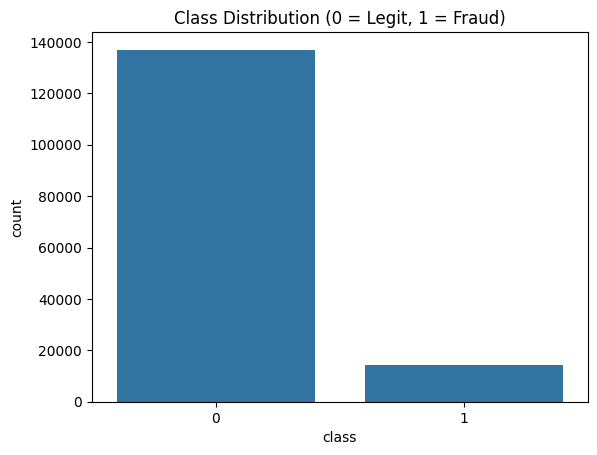

In [11]:
sns.countplot(x="class", data=fraud_df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()


### 4.2 Univariate analysis

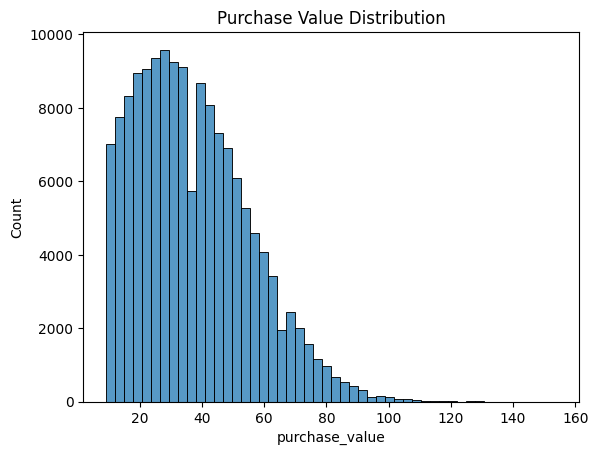

In [12]:
sns.histplot(fraud_df["purchase_value"], bins=50)
plt.title("Purchase Value Distribution")
plt.show()

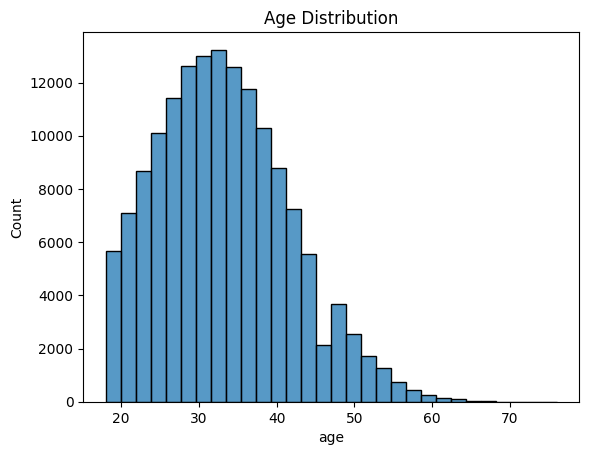

In [13]:
sns.histplot(fraud_df["age"], bins=30)
plt.title("Age Distribution")
plt.show()

### 4.3 Bivariate analysis

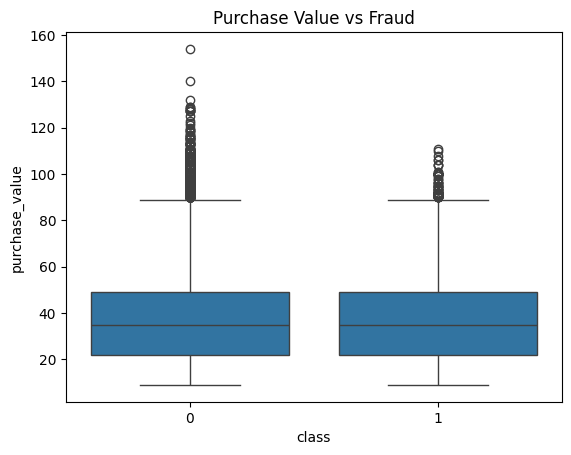

In [14]:
sns.boxplot(x="class", y="purchase_value", data=fraud_df)
plt.title("Purchase Value vs Fraud")
plt.show()

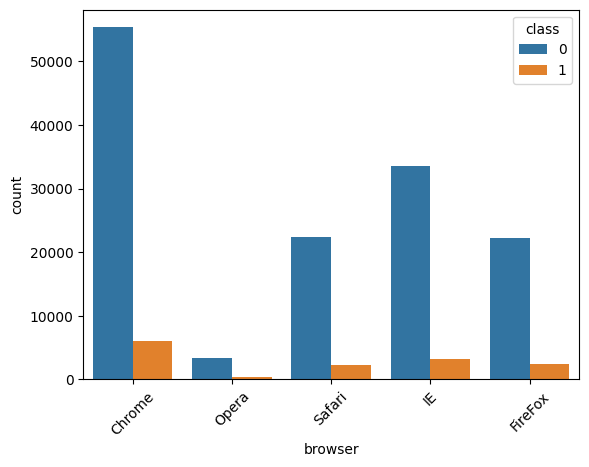

In [15]:
sns.countplot(x="browser", hue="class", data=fraud_df)
plt.xticks(rotation=45)
plt.show()